In [1]:
%matplotlib inline
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [2]:
air = pd.read_csv('Airfares.csv')
air.head(10)

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3,No,Yes,5291.99,28637.0,21112.0,3036732,205711,Free,Free,312,7864,64.11
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3,No,No,5419.16,26993.0,29838.0,3532657,7145897,Free,Free,576,8820,174.47
2,*,Boston MA,*,Baltimore/Wash Intl MD,1.06,3,No,No,9185.28,30124.0,29838.0,5787293,7145897,Free,Free,364,6452,207.76
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Controlled,Free,612,25144,85.47
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Free,Free,612,25144,85.47
5,*,Cleveland OH,*,Baltimore/Wash Intl MD,1.01,3,No,Yes,3408.11,26046.0,29838.0,2230955,7145897,Free,Free,309,13386,56.76
6,*,Dallas/Fort Worth TX,*,Baltimore/Wash Intl MD,1.28,3,No,No,6754.48,28637.0,29838.0,3036732,7145897,Free,Free,1220,4625,228.00
7,*,Fort Lauderdale FL,*,Baltimore/Wash Intl MD,1.15,3,Yes,Yes,5584.00,26752.0,29838.0,1440377,7145897,Free,Free,921,5512,116.54
8,*,Houston TX,*,Baltimore/Wash Intl MD,1.33,3,No,Yes,4662.44,27211.0,29838.0,3770125,7145897,Free,Free,1249,7811,172.63
9,*,Kansas City MO,*,Baltimore/Wash Intl MD,1.60,2,No,Yes,2617.00,25450.0,29838.0,1694803,7145897,Free,Free,964,4657,114.76


In [3]:
air.dtypes

S_CODE       object
S_CITY       object
E_CODE       object
E_CITY       object
COUPON      float64
NEW           int64
VACATION     object
SW           object
HI          float64
S_INCOME    float64
E_INCOME    float64
S_POP         int64
E_POP         int64
SLOT         object
GATE         object
DISTANCE      int64
PAX           int64
FARE        float64
dtype: object

In [4]:
#a

In [5]:
air_num = air[['COUPON','NEW','HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'DISTANCE', 'PAX']] # 수치형변수

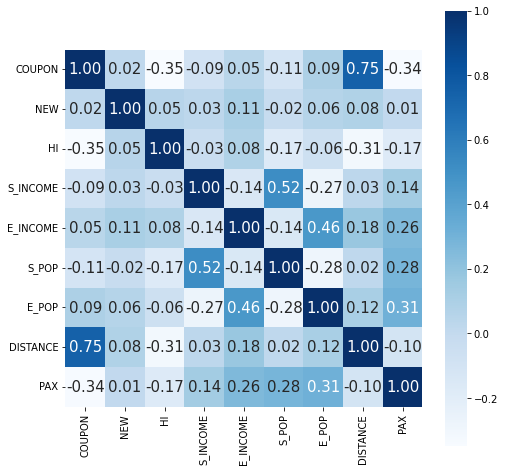

In [7]:
## 운임에 대한 상관관계 표
corr = air_num.corr(method="pearson")

import seaborn as sns

fig, ax= plt.subplots()
fig.set_size_inches(8,8)

df_heatmap = sns.heatmap(corr, cbar = True, 
                         annot = True, annot_kws={'size' : 15}, 
                         fmt = '.2f', square = True, cmap = 'Blues')

In [11]:
##운임과 예측변수들 사이의 산점도 그리기

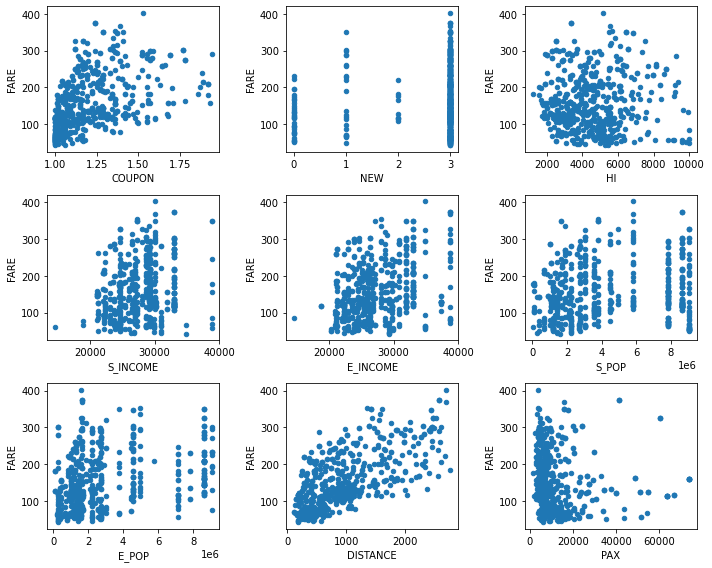

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,8))
lst =[['COUPON', 'NEW', 'HI'], ['S_INCOME', 'E_INCOME', 'S_POP'], ['E_POP', 'DISTANCE', 'PAX']]
for i in range(0,3):
    for j in range(0,3):
        ax = air_num.plot.scatter(x=lst[i][j], y='FARE', ax=axes[i][j])
        ax.set_xlabel(lst[i][j])
        if i == 2 and j == 2:
            break
plt.tight_layout()
plt.show()

In [18]:
## distance가 운임을 예측하는데에 최적의 변수로 보인다.

In [19]:
#b

In [ ]:
## 분류형 예측변수들에 대해 각 범주별로 비행편의 백분율을 계산하여 조사하시오

In [91]:
air_class = air[['VACATION', 'SW', 'SLOT', 'GATE', 'FARE']]
print('vacation 사이즈> \n\n' ,air_class.groupby('VACATION').size(), '\n')
print('sw 사이즈> \n\n' ,air_class.groupby('SW').size(), '\n')
print('slot 사이즈> \n\n' ,air_class.groupby('SLOT').size(), '\n')
print('gate 사이즈> \n\n' ,air_class.groupby('GATE').size())

vacation 사이즈> 

 VACATION
No     468
Yes    170
dtype: int64 

sw 사이즈> 

 SW
No     444
Yes    194
dtype: int64 

slot 사이즈> 

 SLOT
Controlled    182
Free          456
dtype: int64 

gate 사이즈> 

 GATE
Constrained    124
Free           514
dtype: int64


In [92]:
vacation_no=air_class[air_class['VACATION']=='No'].FARE.mean()
vacation_yes=air_class[air_class['VACATION']=='Yes'].FARE.mean()

sw_no=air_class[air_class['SW']=='No'].FARE.mean()
sw_yes=air_class[air_class['SW']=='Yes'].FARE.mean()

slot_con=air_class[air_class['SLOT']=='Controlled'].FARE.mean()
slot_free=air_class[air_class['SLOT']=='Free'].FARE.mean()


gate_con=air_class[air_class['GATE']=='Constrained'].FARE.mean()
gate_free=air_class[air_class['GATE']=='Free'].FARE.mean()

In [93]:
data = {'vacation_no': [468/638,vacation_no], 
        'vacation_yes':[(170/638),vacation_yes],
        'sw_no':[444/638,sw_no],
        'sw_yes':[(638-444)/638,sw_yes],
        'slot_con':[182/638,slot_con],
        'slot_free':[456/638,slot_free],
        'gate_con':[124/638,gate_con],
        'gate_free':[514/638,gate_free]
       }
df = pd.DataFrame(data)
df # 첫 행은 각각의 백분율 , 두번째 행은 평균 운임을 보여줌

,vacation_no,vacation_yes,sw_no,sw_yes,slot_con,slot_free,gate_con,gate_free
0,0.733542,0.266458,0.695925,0.304075,0.285266,0.714734,0.194357,0.805643
1,173.552500,125.980882,188.182793,98.382268,186.059396,150.825680,193.129032,153.095953


In [65]:
## SW 변수가 범주 다른 것에 따라 운임료 차이가 가장 많이나는 것을 보아서 운임을 예측하는데 가장 좋은 예측변수인 것 같다.

In [ ]:
#c 
# 새로운 노선의 평균운임예측

In [ ]:
##1

In [142]:
predictors= ['COUPON', 'NEW', 'VACATION', 'SW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'SLOT', 'GATE', 'DISTANCE', 'PAX']
outcome='FARE'

X = pd.get_dummies(air[predictors], drop_first=True) # 범주형 변수 가변수로 변환
y = air[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1) # 학습세트와 검증세트로 분할 
air_lm = LinearRegression()
air_lm.fit(train_X, train_y) #학습세트에 대해 모델 적합

LinearRegression()

In [101]:
# 검증세트에 대해 평가
air_pred = model.predict(valid_X)

print("adjusted r2 :", adjusted_r2_score(valid_y, air_pred, air_lm))
print("AIC :", AIC_score(valid_y, air_pred, air_lm))
print("BIC :", BIC_score(valid_y, air_pred, air_lm))

adjusted r2 : 0.7777314391756964
AIC : 2591.261260459084
BIC : 2644.4389221262772


In [102]:
## 2 

In [104]:
## 예측변수를 줄이기 위해 단계적 회귀
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

In [105]:
best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: COUPON, NEW, HI, S_INCOME, E_INCOME, S_POP, E_POP, DISTANCE, PAX, VACATION_Yes, SW_Yes, SLOT_Free, GATE_Free
Start: score=4379.42, constant
Step: score=4149.88, add DISTANCE
Step: score=4025.89, add SW_Yes
Step: score=3913.59, add VACATION_Yes
Step: score=3890.27, add HI
Step: score=3873.33, add GATE_Free
Step: score=3852.81, add SLOT_Free
Step: score=3850.30, add PAX
Step: score=3844.58, add E_POP
Step: score=3826.43, add S_POP
Step: score=3821.88, add E_INCOME
Step: score=3821.88, unchanged None
['DISTANCE', 'SW_Yes', 'VACATION_Yes', 'HI', 'GATE_Free', 'SLOT_Free', 'PAX', 'E_POP', 'S_POP', 'E_INCOME']


In [ ]:
## 3

In [106]:
## 전역탐색 
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    pred_y = model.predict(train_X[variables])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)

data = []
for result in results:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
pd.set_option('display.width', 100)
print(pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables))))
pd.reset_option('display.width')

     n     r2adj          AIC  COUPON  DISTANCE  E_INCOME  E_POP  GATE_Free     HI    NEW    PAX  \
0    1  0.453107  4149.881509   False      True     False  False      False  False  False  False   
1    2  0.605715  4025.892420   False      True     False  False      False  False  False  False   
2    3  0.706909  3913.585125   False      True     False  False      False  False  False  False   
3    4  0.724977  3890.268211   False      True     False  False      False   True  False  False   
4    5  0.737584  3873.328296   False      True     False  False       True   True  False  False   
5    6  0.751947  3852.808698   False      True     False  False       True   True  False  False   
6    7  0.758747  3843.170960   False      True     False   True      False   True  False   True   
7    8  0.765105  3833.945866   False      True     False   True       True   True  False   True   
8    9  0.770266  3826.433471   False      True     False   True       True   True  False   True   


In [ ]:
## 9번째 시도 후에 안정된 형태임, r^2의 값이 증가하다가 안정된 형태가 되는 순간
# 'DISTANCE',  'E_INCOME', 'E_POP',  'GATE_Free', 'HI', 'PAX', 'SLOT_Free', 'S_INCOME',  'S_POP',  'VACATION_Yes'

In [107]:
## 4

In [134]:
air_dum=X # c에서 가변수 적용한 데이터 이용함 

In [135]:
### 단계적으로 얻은 것
predictors=['DISTANCE',  'E_INCOME', 'E_POP',  'GATE_Free', 'HI', 'PAX', 'SLOT_Free', 'S_POP',  'VACATION_Yes']
outcome='FARE'

X1 = pd.get_dummies(air_dum[predictors], drop_first=True) # 범주형 변수 가변수로 변환
y1 = air[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X1, y1, test_size=0.4, random_state=1) # 학습세트와 검증세트로 분할 
air_step = LinearRegression()
air_step.fit(train_X, train_y) #학습 세트에 대해 모델 적합

LinearRegression()

In [136]:
# 단계적을 이용해 얻은 모형의 RMSE와 평균오차 출력
airfare_pred = air_step.predict(valid_X)
regressionSummary(valid_y, airfare_pred) 


Regression statistics

                      Mean Error (ME) : -1.0953
       Root Mean Squared Error (RMSE) : 39.8834
            Mean Absolute Error (MAE) : 31.9759
          Mean Percentage Error (MPE) : -9.4110
Mean Absolute Percentage Error (MAPE) : 25.3325


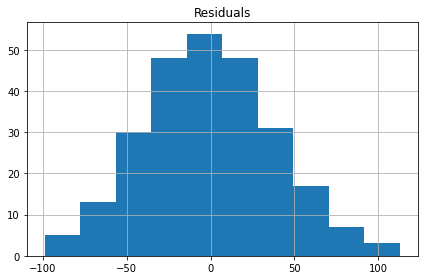

In [137]:
# 단계적 방법을 통한 히스토그램
airfare_residuals = valid_y - airfare_pred
ax = pd.DataFrame({"Residuals":airfare_residuals}).hist()
plt.tight_layout()
plt.show()

In [145]:
air_dum=X # c에서 가변수 적용한 데이터 이용함 

In [146]:
### 전역으로 얻은 것
predictors=['DISTANCE',  'E_INCOME', 'E_POP',  'GATE_Free', 'HI', 'PAX', 'SLOT_Free', 'S_INCOME', 'S_POP',  'VACATION_Yes']
outcome='FARE'

X = pd.get_dummies(air_dum[predictors], drop_first=True) # 범주형 변수 가변수로 변환
y = air[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1) # 학습세트와 검증세트로 분할 
air_all = LinearRegression()
air_all.fit(train_X, train_y) #학습 세트에 대해 모델 적합

LinearRegression()

In [147]:
# 전역을 이용해 얻은 모형의 RMSE와 평균오차 출력
airfare_pred = air_all.predict(valid_X)
regressionSummary(valid_y, airfare_pred) 


Regression statistics

                      Mean Error (ME) : -1.1230
       Root Mean Squared Error (RMSE) : 38.7235
            Mean Absolute Error (MAE) : 31.1888
          Mean Percentage Error (MPE) : -9.0537
Mean Absolute Percentage Error (MAPE) : 24.6163


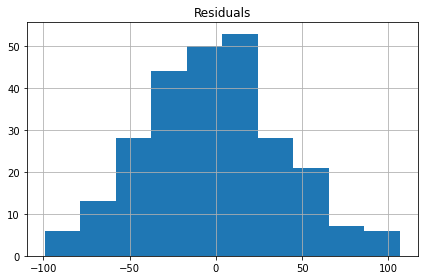

In [148]:
# 전역 방법을 통한 히스토그램
airfare_residuals = valid_y - airfare_pred
ax = pd.DataFrame({"Residuals":airfare_residuals}).hist()
plt.tight_layout()
plt.show()

In [ ]:
## 단계적으로 얻은 히스토그램이 잔차 평균을 중심으로 대칭적인 형태임을 알 수 있으며 더 적절한 모형이라 볼 수 있다.

In [149]:
## 5 전역탐색을 통해 얻은 모델로 운임 예측

In [154]:
airfare_pred3 = air_all.predict([[1976, 27644, 3195503, 1, 4442.141, 12782, 1, 28760, 4557004, 0]])
print("Predicted: ", airfare_pred3)

Predicted:  [239.30040735]


In [ ]:
## 6 
# SW = 1이면, 그리고

In [155]:
print('intercept ', air_all.intercept_)
print()
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': air_all.coef_}))

intercept  -50.55054139552601

      Predictor  coefficient
0      DISTANCE     0.080098
1      E_INCOME     0.001921
2         E_POP     0.000006
3     GATE_Free   -31.086582
4            HI     0.008683
5           PAX    -0.001006
6     SLOT_Free   -20.481980
7      S_INCOME     0.002321
8         S_POP     0.000004
9  VACATION_Yes   -27.930319


In [156]:
## 전역단계는 운행여부를 결정하는 SW 변수를 포함하지 않기 때문에 운행한다고 해도 달라지지 않는다.

In [ ]:
#7 모름

In [ ]:
#8

In [ ]:
#9

In [ ]:
#10

In [ ]:
#d